# Data Cleaning and Preprocessing

This notebook is part of the **DataCleaning** project. It focuses on cleaning and preparing a dataset using Python and widely used data science libraries such as:

- `pandas` for data manipulation  
- `numpy` for numerical operations  
- `matplotlib` and `seaborn` for basic visualization

The aim is to structure the data in a way that makes it suitable for further analysis or machine learning tasks. Steps and techniques are added progressively as the work evolves.


## Dataset

The dataset is Adult.csv

In [21]:
import seaborn as sean
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Table

The below code helps convert the csv file into table format, making it readable. It provides information regarding the column names and their types.

In [22]:
df = pd.read_csv('data/adult.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


The df.head() function in pandas is used to display the first few rows of a DataFrame. Lets display the first 20 rows and view their data.

In [23]:
df.head(20) # Display the first 20 rows of the DataFrame

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


We can also display all rows using: print(df.head(len(df)))
However this might be a bad idea since datasets can be huge, still for experimental purposes we are adding the code below:

In [24]:
print(df.head(len(df))) # Display all the rows of the DataFrame

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

capital.gain seems to be zero at a lot of places, lets look at statistics of its not Null values

In [25]:
df[df['capital.gain'] != 0]['capital.gain'].describe()


count     2712.000000
mean     12938.541298
std      22395.413530
min        114.000000
25%       3411.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital.gain, dtype: float64

It seems like this dataset only cares about people in United States, lets confirm whether thats true or not:

In [26]:
df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

Let us print the distribution of countries (except '?')

C:\Users\Adite\AppData\Local\Temp\ipykernel_24220\1853099191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sean.countplot(data=filtered_df, x='native.country', order=filtered_df['native.country'].value_counts().index, palette='viridis')


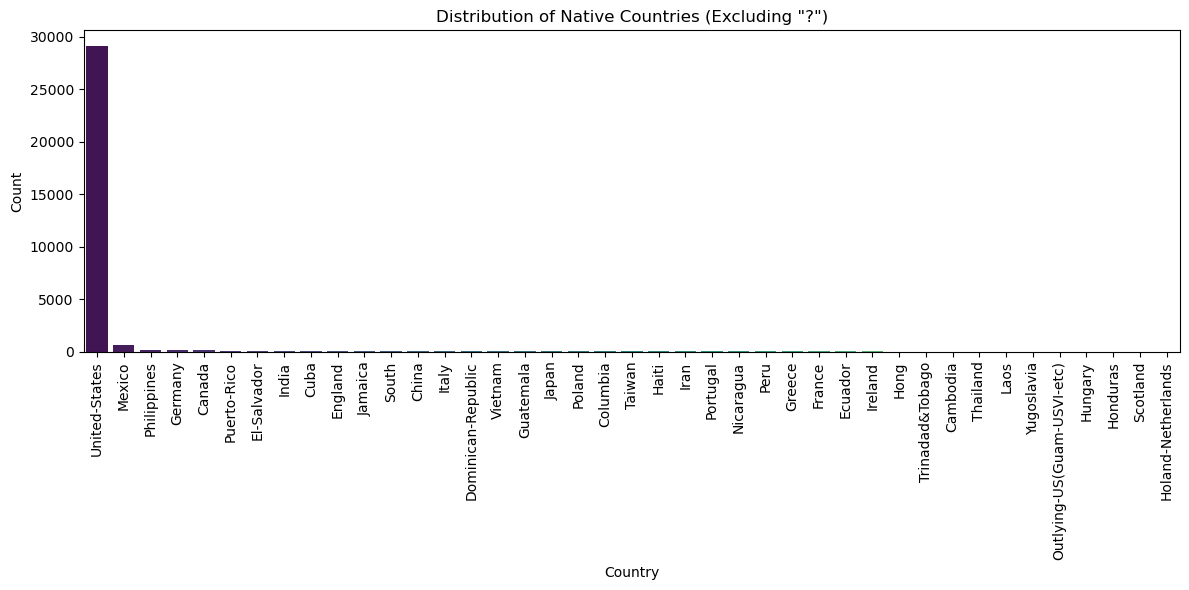

In [27]:
# Filter out rows where native.country is '?'
filtered_df = df[df['native.country'] != '?']

# Plot
plt.figure(figsize=(12, 6))
sean.countplot(data=filtered_df, x='native.country', order=filtered_df['native.country'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Native Countries (Excluding "?")')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The ? suggests that the dataset is unaware of the native country of these people. We can either remove these rows, or fill them with some random value, for now we will fill them such that the distirbution is maintained (somewhat).

In [28]:
valid_countries = df[df['native.country'] != ' ?']['native.country'] # Filtereing out countries having '?'
country_probs = valid_countries.value_counts(normalize=True) # Getting a count of each country
missing_count = (df['native.country'] == '?').sum() # Getting the count of missing values in the column

# Printing the values:
print("Country probabilities: ", country_probs)
print(f"Missing values in 'native.country': {missing_count}")


np.random.seed(0)  # For reproducibility (get same random numbers each time)
fill_values = np.random.choice(
    country_probs.index,
    size=missing_count,
    p=country_probs.values
)

df_copy = df.copy() # Creating a copy of the DataFrame to avoid modifying the original

df_copy.loc[df['native.country'] == '?', 'native.country'] = fill_values # Filling the missing values with the random choices

Country probabilities:  native.country
United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                 

Lets look at the new distribution.

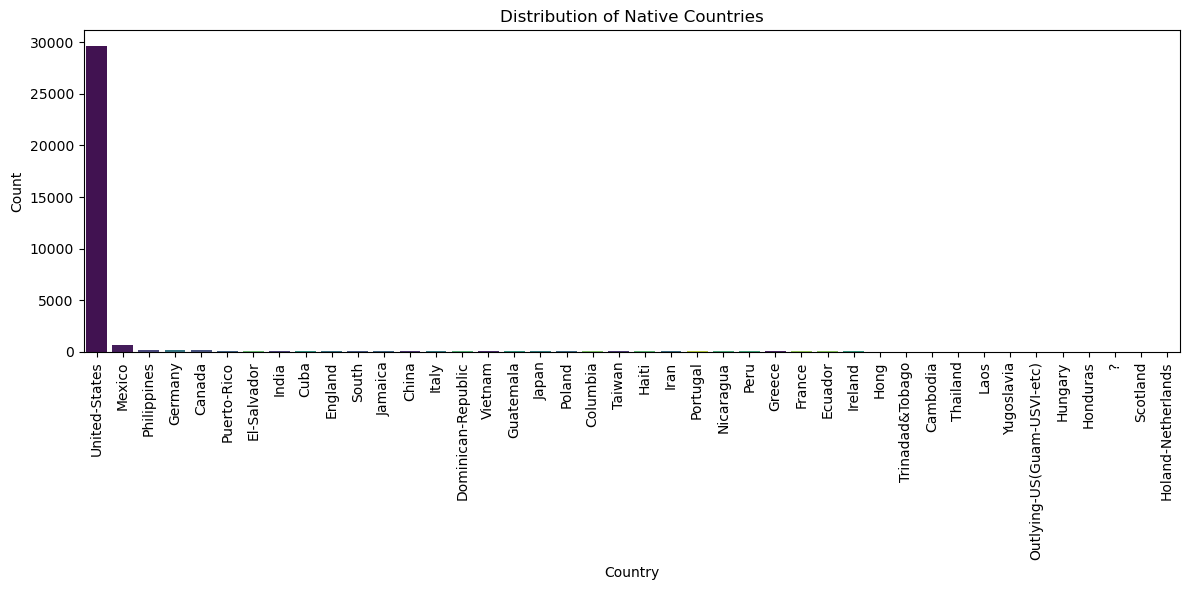

In [30]:
plt.figure(figsize=(12, 6))
# Plotting the distribution of native countries after filling missing values (in copy of df)
sean.countplot(data=df_copy, x='native.country', order=df_copy['native.country'].value_counts().index, palette='viridis', hue='native.country', legend=False)
plt.xticks(rotation=90)
plt.title('Distribution of Native Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Since United-States as a disproportionately high number, we can also replace all '?' values with Unites-States. Currently I have created a copy of df and replaced the values, but the above code can be edited to not create a copy and make changes into df directly.